Problem 2: [3 Marks]
1. Use Our World in Data (OWID) COVID‑19 dataset from the link below:
https://ourworldindata.org/coronavirus/country/india
2. As we know, in the initial months from 1st Mar 2020 to 31st May 2020, COVID cases
spiked at an exponential rate.
x= date; y=new_cases.
3. Assume an exponential model for the growth as below:
y=A⋅eBx
4. Use the extracted data for the above-mentioned period to fit a Linear Regression model
after transforming the data to a log scale. (hint: convert the dates in the given range to
days 0,1,2,,3,...)
5. Plot the Actual Data and predicted data in log scale using a scatter plot.
6. Print the SSE between the actual and predicted.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

covid_df=pd.read_csv('owid-covid-data.csv')
#covid_df.head(5)

india_covid_df=covid_df[covid_df['location']=='India'].copy()
#india_covid_df.head(5)


india_covid_90days_df=india_covid_df.query("'2020-03-01'<= date <='2020-05-31'")
#india_covid_90days_df.count()
india_covid_90days_df.head(5)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173605,IND,Asia,India,2020-03-01,7.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173606,IND,Asia,India,2020-03-02,7.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173607,IND,Asia,India,2020-03-03,7.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173608,IND,Asia,India,2020-03-04,7.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173609,IND,Asia,India,2020-03-05,7.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN


In [34]:
#(pd.to_datetime('2020-03-02')- pd.to_datetime('2020-03-01')).days

#india_covid_90days_df['days']=india_covid_90days_df['days'].copy()
india_covid_90days_df['days']=  (pd.to_datetime(india_covid_90days_df['date']) - pd.to_datetime('2020-03-01')).dt.days
#india_covid_90days_df

X= india_covid_90days_df['days'].values.reshape(-1,1)
y=india_covid_90days_df['new_cases'].values
#type(X)
#y.shape


valid_indices = y > 0
X_valid = X[valid_indices]
y_valid = y[valid_indices]
log_y = np.log(y_valid)


/var/folders/34/sf1tkvh50f5_hfh1mfn4hfrc0000gn/T/ipykernel_1156/2176127590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_covid_90days_df['days']=  (pd.to_datetime(india_covid_90days_df['date']) - pd.to_datetime('2020-03-01')).dt.days


In [35]:
model = LinearRegression()
model.fit(X_valid, log_y)


B = model.coef_[0]
log_A = model.intercept_
A = np.exp(log_A)

print(f' exponential model: y = {A:.2f} * e({B:.4f} * x)')

 exponential model: y = 48.05 * e(0.0864 * x)


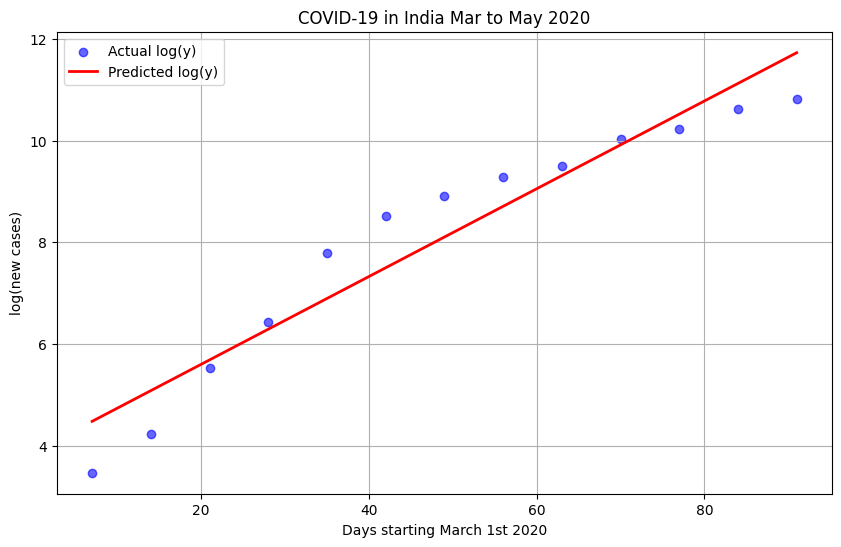

In [36]:
# Predict log_y values using the model
log_y_pred = model.predict(X_valid)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_valid, log_y, color='blue', label='Actual log(y)', alpha=0.6)
plt.plot(X_valid, log_y_pred, color='red', label='Predicted log(y)', linewidth=2)
plt.xlabel('Days starting March 1st 2020')
plt.ylabel('log(new cases)')
plt.title('COVID-19 in India Mar to May 2020')
plt.legend()
plt.grid(True)
plt.show()

In [37]:

sse = np.sum((log_y - log_y_pred) ** 2)
print('\nSSE:',sse )



SSE: 5.804324569365022
